In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from GPyOpt.methods import BayesianOptimization
import GPy
import GPyOpt
from numpy.random import seed
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from GPyOpt.objective_examples.experiments2d import function2d
class MyObj(function2d):
    '''
    Cosines function
    
    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''
    def __init__(self,bounds=None,sd=None):
        self.input_dim = 2
        if bounds == None: self.bounds = [(0,100),(0,100)]
        else: self.bounds = bounds
        self.min = [(0, 0)]
        self.fmin = 0
        if sd==None: self.sd = 0
        else: self.sd=sd
        self.name = 'MyObj'

    def f(self,X):
#         X = reshape(X,self.input_dim)
        n = X.shape[0]
        if X.shape[1] != self.input_dim:
            return 'Wrong input dimension'
        else:
            fval = -((2*X[:,1]**2+X[:,0]**2)>100**2)*2 - 1
            if self.sd ==0:
                noise = np.zeros(n).reshape(n,1)
            else:
                noise = np.random.normal(0,self.sd,n).reshape(n,1)
            return -fval.reshape(n,1) + noise


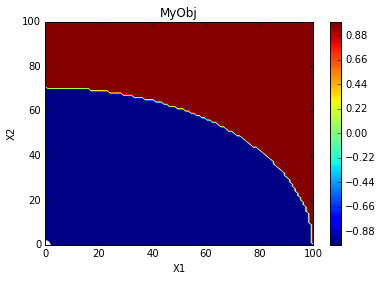

In [3]:
obj = MyObj()
myf = obj.f
obj.plot()

In [4]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,100)},
          {'name': 'var_2', 'type': 'continuous', 'domain': (0,100)}]
max_iter = 20

In [5]:
myProblem = BayesianOptimization(myf,bounds,acquisition_type="BinaryT",
                                 evaluator_type = 'local_penalization',
                                 batch_size = 1,
                                 num_cores = 1,)

100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


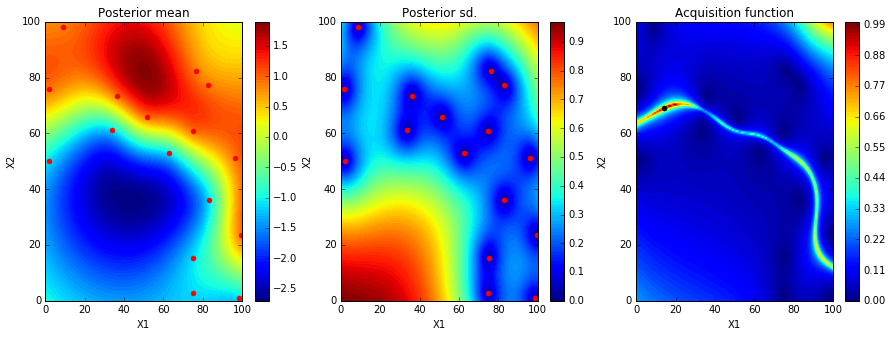

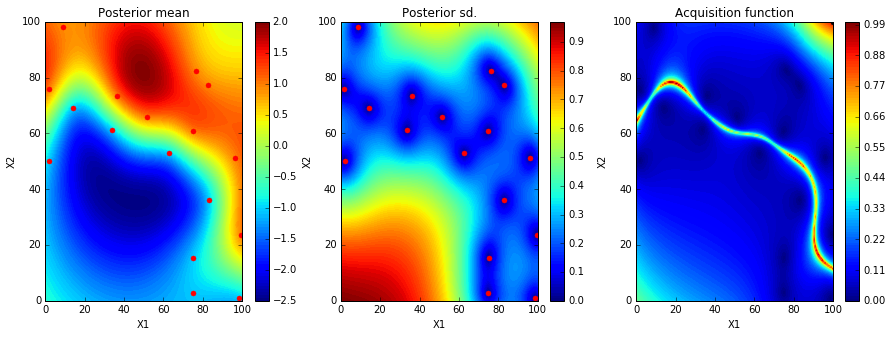

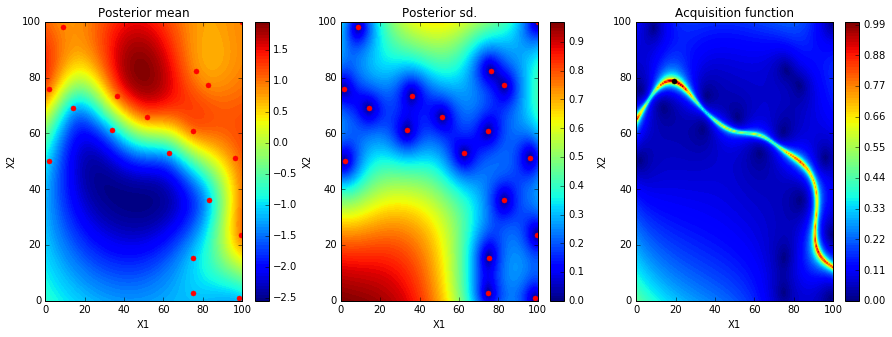

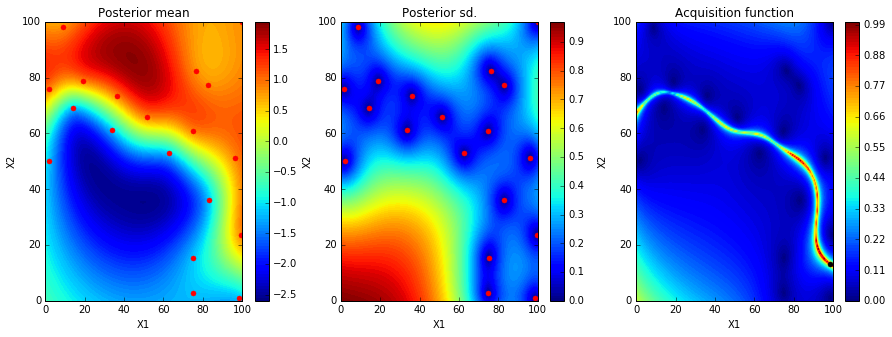

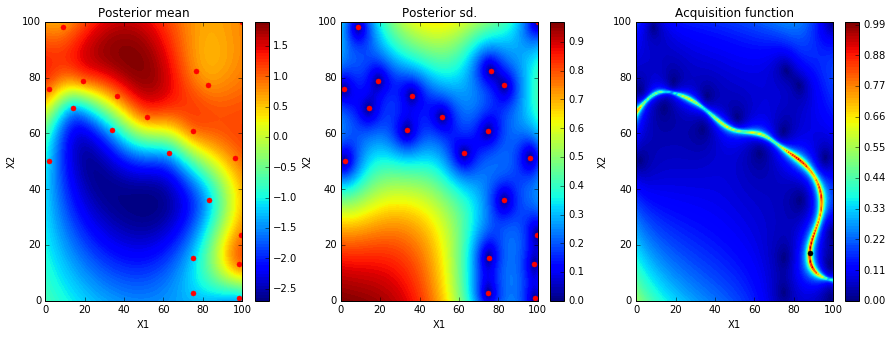

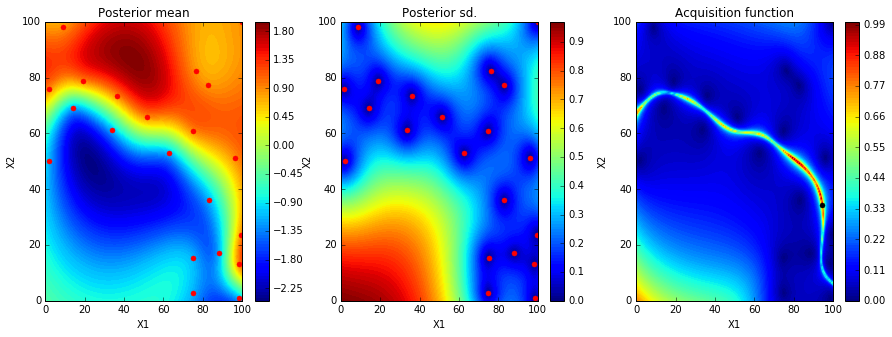

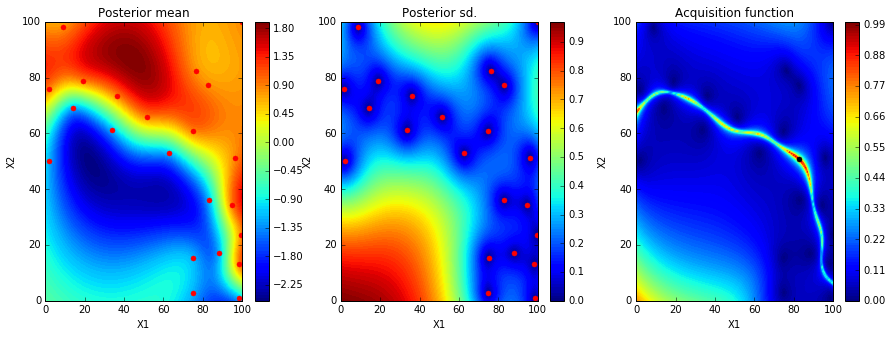

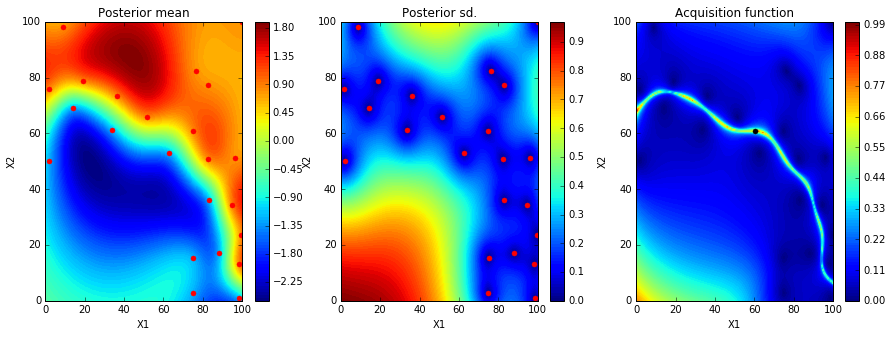

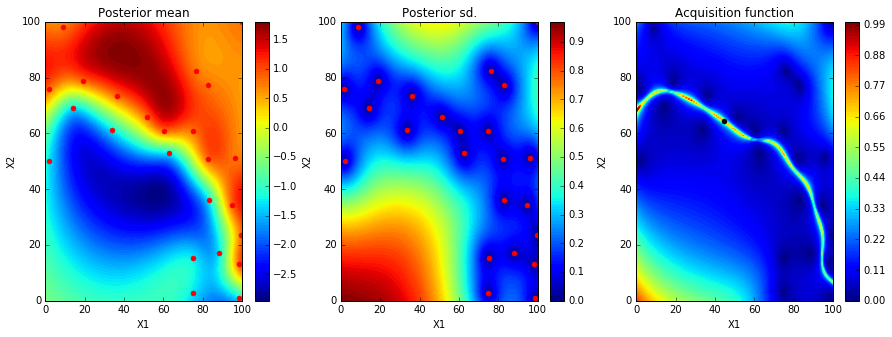

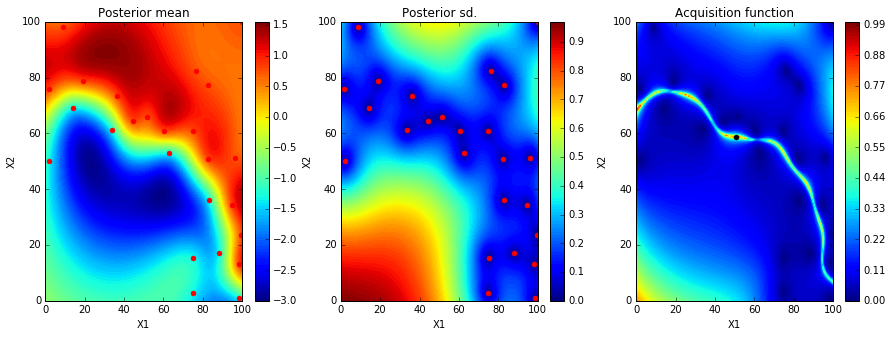

In [11]:
from IPython.display import clear_output

for i in tqdm(range(10)):
    myProblem.run_optimization(max_iter=1) 
    myProblem.plot_acquisition()

# batch of equal iters

In [12]:
myProblemBatch = BayesianOptimization(myf,bounds,acquisition_type="BinaryT",
                                 evaluator_type = 'local_penalization',
                                 batch_size = 2,
                                 num_cores = 1,)

r
[  7.29995415e-12]


  0%|          | 0/10 [00:00<?, ?it/s]

r
[  1.40286728e-13]
r
[  1.79291226e-13]


 10%|█         | 1/10 [00:02<00:21,  2.34s/it]

r
[  1.89267229e-13]
r
[ 0.28136445]


 20%|██        | 2/10 [00:04<00:17,  2.18s/it]

r
[ 0.28136445]
r
[  8.06128652e-12]


 30%|███       | 3/10 [00:06<00:14,  2.10s/it]

r
[  8.06128652e-12]
r
[ 0.91282131]


 40%|████      | 4/10 [00:08<00:12,  2.13s/it]

r
[ 0.91282136]
r
[  6.96890431e-13]


 50%|█████     | 5/10 [00:10<00:10,  2.15s/it]

r
[  6.96890438e-13]
r
[  4.06097497e-12]


 60%|██████    | 6/10 [00:13<00:09,  2.41s/it]

r
[  4.06097496e-12]
r
[  3.06534347e-12]


 70%|███████   | 7/10 [00:15<00:07,  2.43s/it]

r
[  3.06534345e-12]
r
[ 0.]


 80%|████████  | 8/10 [00:18<00:04,  2.36s/it]

r
[ 0.]
r
[ 1.12026953]


 90%|█████████ | 9/10 [00:20<00:02,  2.22s/it]

r
[ 1.12026954]
r
[ 0.]


100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


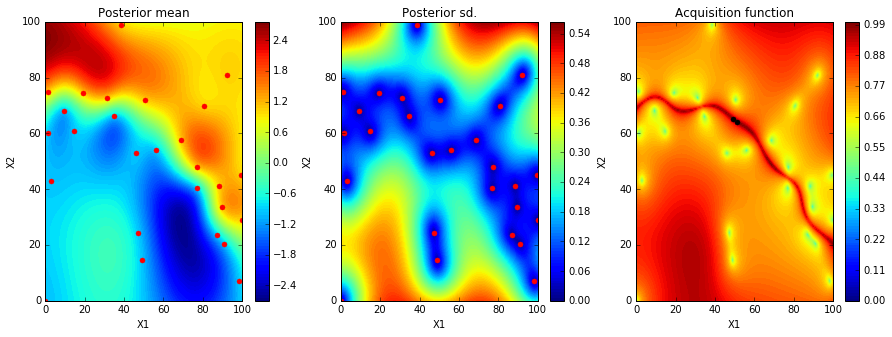

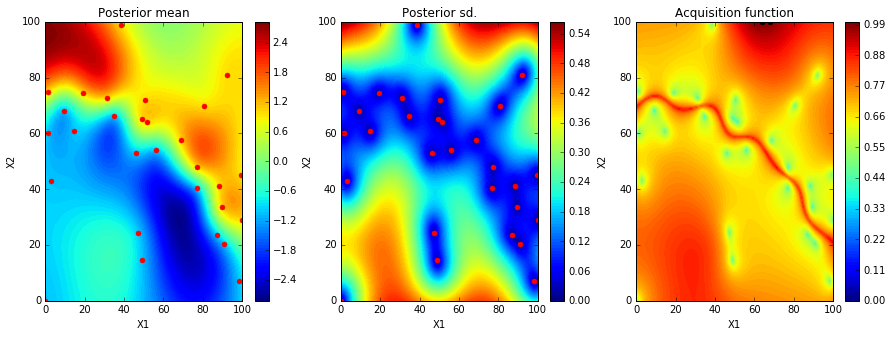

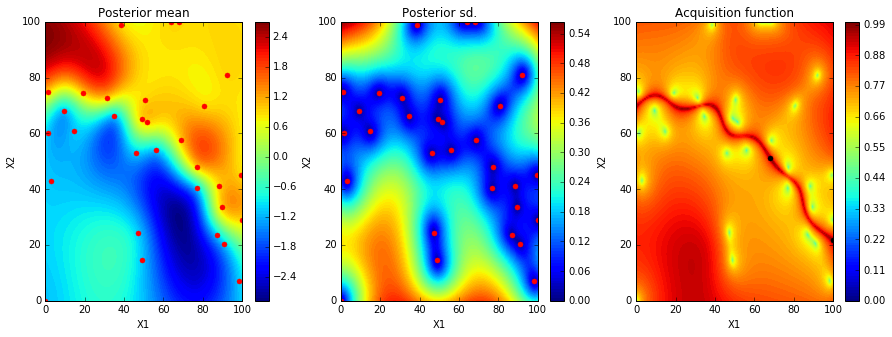

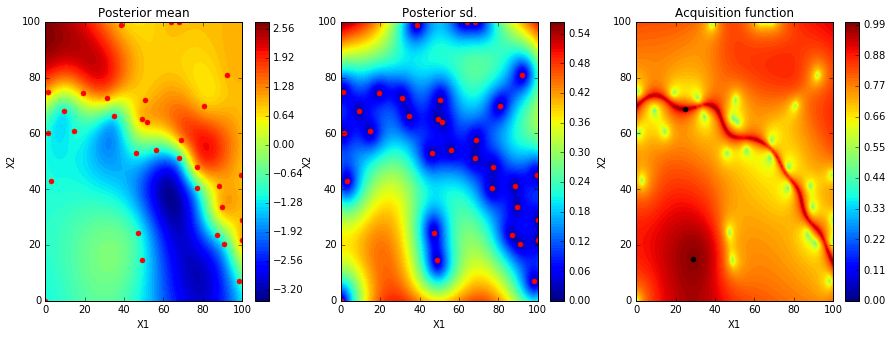

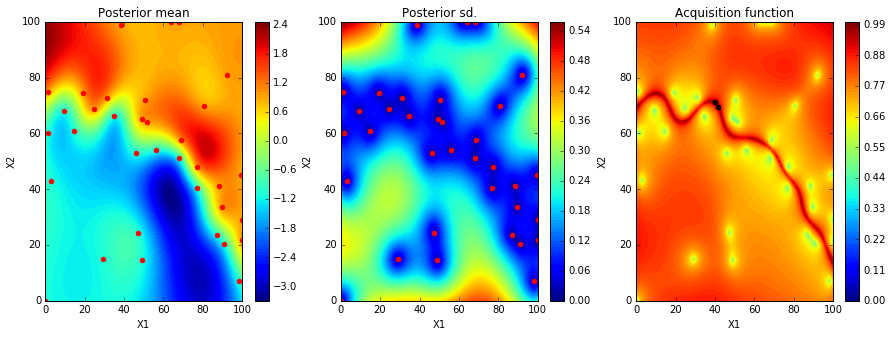

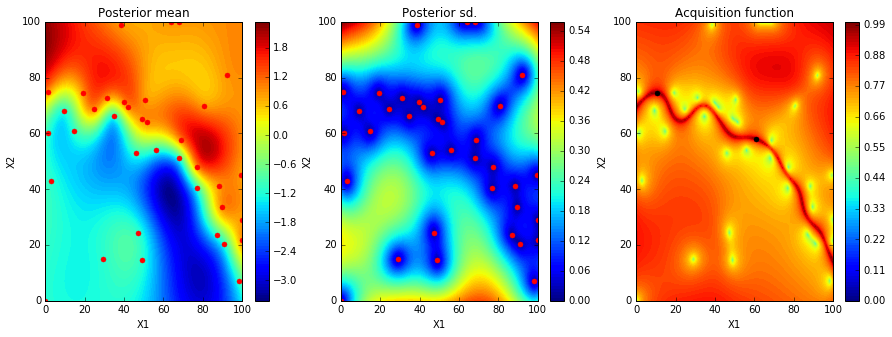

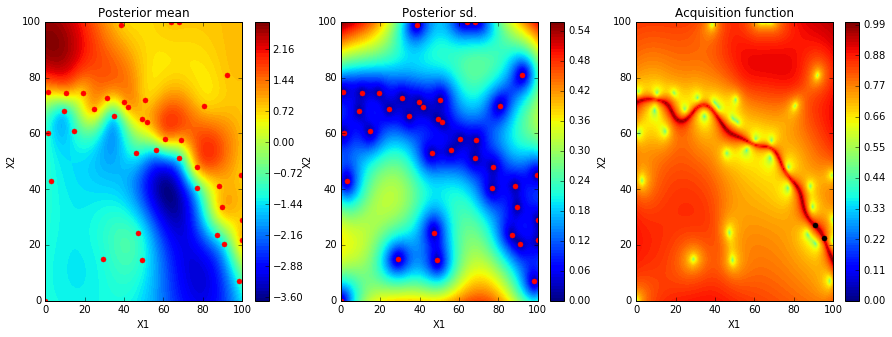

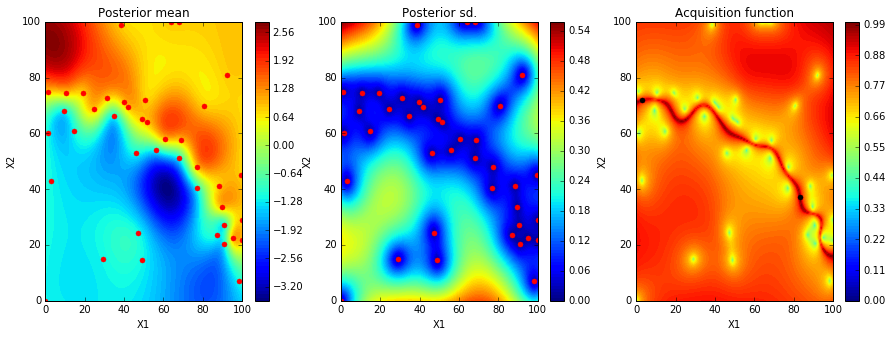

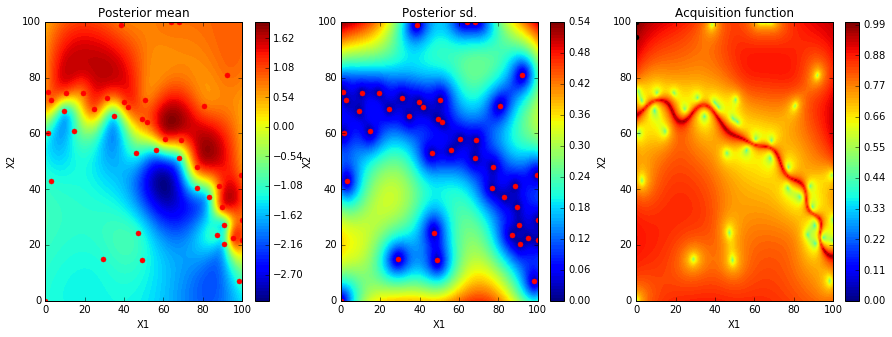

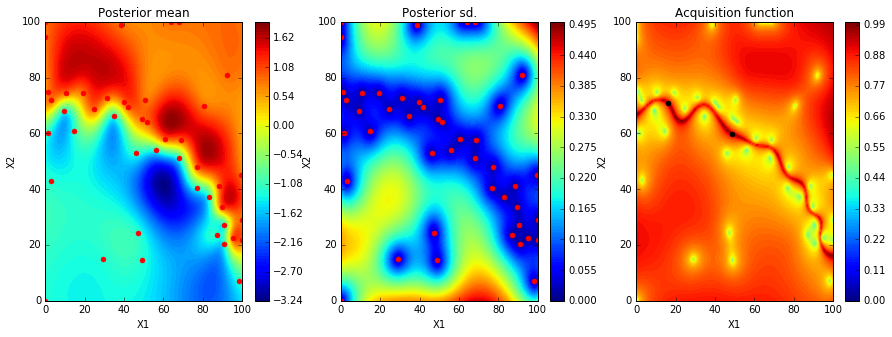

In [14]:
from IPython.display import clear_output

for i in tqdm(range(10)):
    myProblemBatch.run_optimization(max_iter=1) 
    myProblemBatch.plot_acquisition()